## Implementing K-Means Clustering on Customer Segments



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# Extract relevent features
X = df[['Annual Income (k$)','Spending Score (1-100)']]


In [5]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.cluster import KMeans
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)

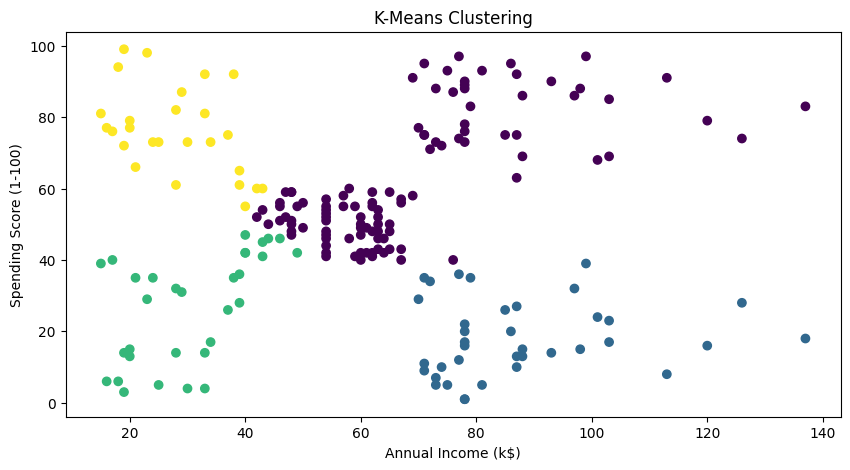

In [10]:
## Plot the clusters based on the first two features
#from matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()

## Optimal Number of Clusters: Elbow Method and Silhouette Score

In [ ]:
## Elbow Method

# Calculate the sum of squared distances for different numbers of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to find the "elbow"
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


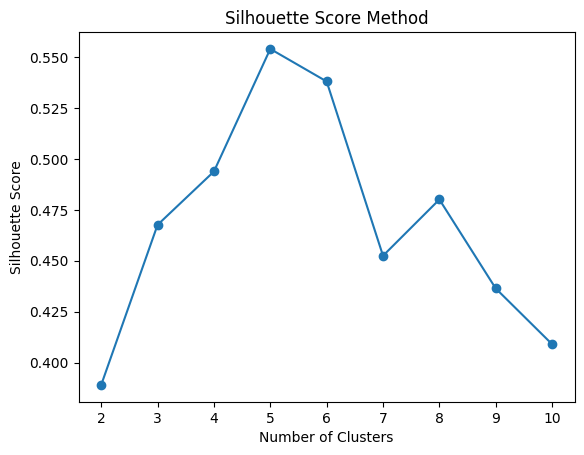

In [12]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0,n_init="auto")
    clusters = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, clusters))

# Plot the silhouette scores to find the optimal number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


## Cluster Profiling and Insights

In [17]:
df_encoded = pd.get_dummies(df, columns=['Gender'])

In [19]:
# Add cluster labels to the original dataset
df_encoded['Cluster'] = kmeans.labels_

# Calculate average income and spending score for each cluster
cluster_summary = df_encoded.groupby('Cluster').mean()
cluster_summary




,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
Cluster,,,,,,
0,166.250000,41.000000,89.406250,15.593750,0.437500,0.562500
1,107.456522,42.152174,63.086957,46.217391,0.565217,0.434783
2,22.555556,38.000000,25.888889,32.777778,0.666667,0.333333
3,144.000000,33.142857,75.095238,82.761905,0.571429,0.428571
4,22.000000,25.333333,25.095238,80.047619,0.571429,0.428571
5,20.166667,48.750000,24.583333,9.583333,0.583333,0.416667
6,197.000000,33.750000,124.000000,81.750000,0.500000,0.500000
7,179.000000,31.714286,93.000000,81.285714,0.500000,0.500000
8,67.321429,41.714286,48.464286,55.500000,0.607143,0.392857


# Criteria for Selecting the Number of Clusters

The number of clusters will be chosen based on the following criteria:

Elbow Method: Select the number of clusters at the point where the plot of Within-Cluster Sum of Squares (WCSS) shows a noticeable bend or "elbow." This indicates a balance between reducing WCSS and avoiding excessive complexity.

Silhouette Score: Choose the number of clusters that has the highest average silhouette score, which suggests that the clusters are well-separated and data points are appropriately grouped.








## Hierarchical Clustering for Customer Segmentation

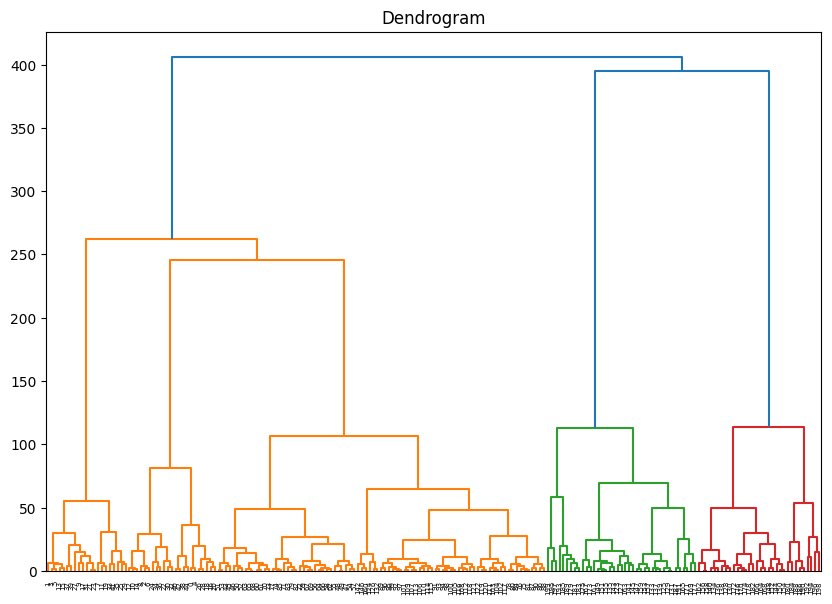

In [22]:
import scipy.cluster.hierarchy as sch

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()


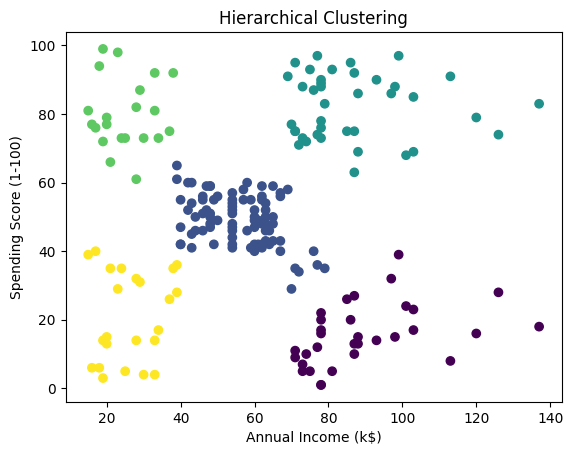

In [24]:
from sklearn.cluster import AgglomerativeClustering

# Apply hierarchical clustering with a specified number of clusters 
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hc_clusters = hierarchical.fit_predict(X)

# Plot the clusters from hierarchical clustering
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=hc_clusters, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchical Clustering')
plt.show()


# discuss the differences.

When comparing hierarchical clustering with K-Means clustering, several key differences emerge.K-Means clustering requires specifying the number of clusters in advance and forms spherical clusters, making it efficient and scalable for large datasets. Hierarchical clustering, on the other hand, doesn’t need a predefined number of clusters and provides a dendrogram to visualize cluster formation. While hierarchical clustering offers more flexibility and insight into the data structure, it can be computationally intensive for large datasets.

## Visualizing Clusters with PCA

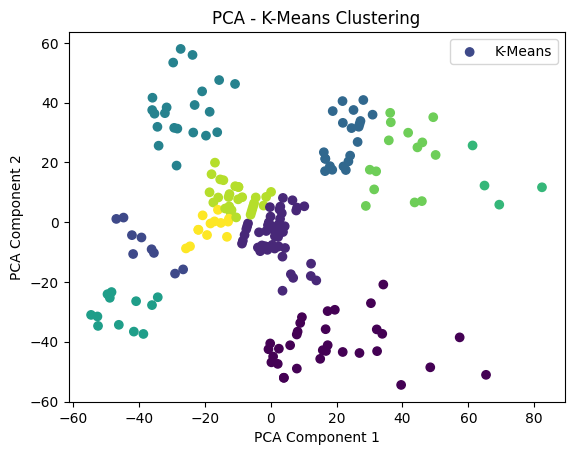

In [26]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot K-Means clusters in PCA-reduced space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', label='K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA - K-Means Clustering')
plt.legend()
plt.show()



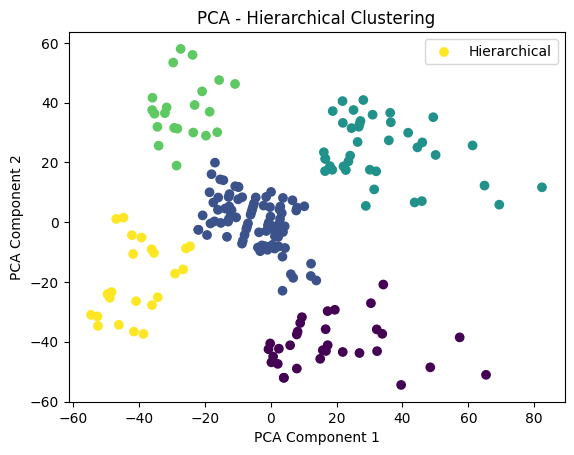

In [27]:
# Plot Hierarchical clusters in PCA-reduced space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_clusters, cmap='viridis', label='Hierarchical')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA - Hierarchical Clustering')
plt.legend()
plt.show()